In [1]:
from meta import analyze_collection
from nilearn.datasets import load_mni152_brain_mask
from nilearn.input_data import NiftiMasker
from nilearn import plotting as niplt
from pyns import Neuroscout
import nibabel as nib
from pathlib import Path
from nimare.meta import ibma
from pyns import Neuroscout
import json
import sys
%matplotlib inline

ERROR:duecredit:Failed to import duecredit due to No module named 'duecredit'


# Single-predictor models for key features
Meta-analyses of 16 different features: 11 ClarifAI labels, 3 other visual features (face detection, brightness, and shot change), and 2 audio features (overall volume, and presence of speech). Each model contains only the target feature plus standard nuisance covariates.

In [2]:
single_predictors = json.load(open('../models/single_predictor.json'))
ns = Neuroscout()

# Meta-Analysis

INFO:nimare.extract.utils:Dataset found in /home/alejandro/repos/neuroscout-paper/meta/images/brightness

INFO:nimare.utils:Shared path detected: '/home/alejandro/repos/neuroscout-paper/meta/images/brightness/'
INFO:nimare.utils:Shared path detected: '/home/alejandro/repos/neuroscout-paper/meta/images/brightness/'


meta-analyzing 20 for brightness


/home/alejandro/anaconda3/lib/python3.7/site-packages/nilearn/_utils/niimg.py:62: UserWarning: Non-finite values detected. These values will be replaced with zeros.
  "Non-finite values detected. "
INFO:nimare.extract.utils:Dataset found in /home/alejandro/repos/neuroscout-paper/meta/images/shotChange

INFO:nimare.utils:Shared path detected: '/home/alejandro/repos/neuroscout-paper/meta/images/shotChange/'
INFO:nimare.utils:Shared path detected: '/home/alejandro/repos/neuroscout-paper/meta/images/shotChange/'


meta-analyzing 10 for shotChange


/home/alejandro/anaconda3/lib/python3.7/site-packages/nilearn/_utils/niimg.py:62: UserWarning: Non-finite values detected. These values will be replaced with zeros.
  "Non-finite values detected. "


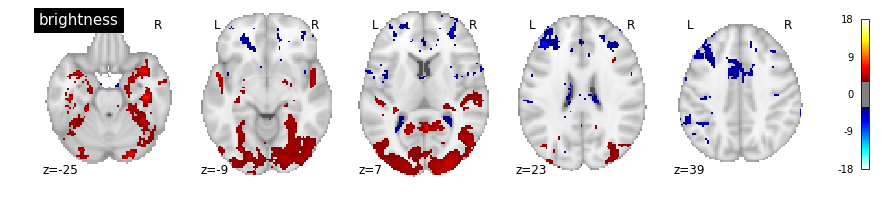

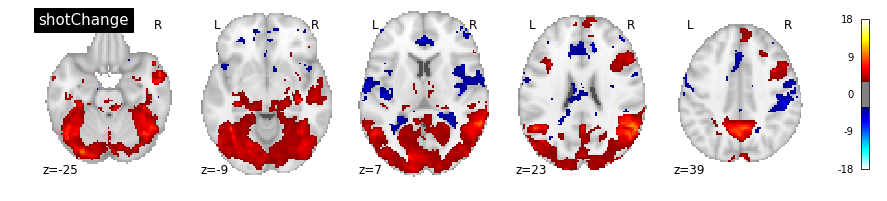

In [15]:
for label in ['brightness', 'shot_change']:
    analyze_collection(
        single_predictors[label], 
        collection_kwargs={'estimator': 'afni'},
        plot_kwargs=dict(vmax=18, cut_coords=range(-25, 55, 16), threshold=3.29)
    )

INFO:nimare.extract.utils:Dataset found in /home/alejandro/repos/neuroscout-paper/meta/images/building

INFO:nimare.utils:Shared path detected: '/home/alejandro/repos/neuroscout-paper/meta/images/building/'
INFO:nimare.utils:Shared path detected: '/home/alejandro/repos/neuroscout-paper/meta/images/building/'


meta-analyzing 20 for building


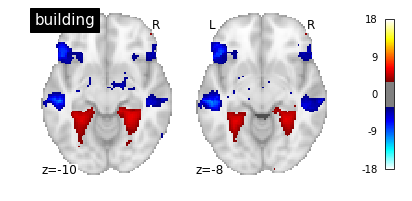

In [6]:
label='building'
analyze_collection(
    single_predictors[label],
    force_recreate=True,
    collection_kwargs={'estimator': 'afni'},
    plot_kwargs=dict(vmax=18, cut_coords=[-10, -8], threshold=3.29)
)

INFO:nimare.extract.utils:Dataset found in /home/alejandro/repos/neuroscout-paper/meta/images/anyFaces

INFO:nimare.utils:Shared path detected: '/home/alejandro/repos/neuroscout-paper/meta/images/anyFaces/'
INFO:nimare.utils:Shared path detected: '/home/alejandro/repos/neuroscout-paper/meta/images/anyFaces/'


meta-analyzing 8 for anyFaces


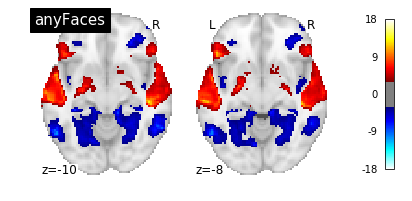

In [12]:
label='any_faces'
analyze_collection(
    single_predictors[label],
    force_recreate=True,
    collection_kwargs={'estimator': 'afni'},
    plot_kwargs=dict(vmax=18, cut_coords=[-10, -8], threshold=3.29)
)

INFO:nimare.extract.utils:Dataset found in /home/alejandro/repos/neuroscout-paper/meta/images/text

INFO:nimare.utils:Shared path detected: '/home/alejandro/repos/neuroscout-paper/meta/images/text/'
INFO:nimare.utils:Shared path detected: '/home/alejandro/repos/neuroscout-paper/meta/images/text/'


meta-analyzing 20 for text


/home/alejandro/anaconda3/lib/python3.7/site-packages/nilearn/_utils/niimg.py:62: UserWarning: Non-finite values detected. These values will be replaced with zeros.
  "Non-finite values detected. "
INFO:nimare.extract.utils:Dataset found in /home/alejandro/repos/neuroscout-paper/meta/images/hand

INFO:nimare.utils:Shared path detected: '/home/alejandro/repos/neuroscout-paper/meta/images/hand/'
INFO:nimare.utils:Shared path detected: '/home/alejandro/repos/neuroscout-paper/meta/images/hand/'


meta-analyzing 20 for hand


/home/alejandro/anaconda3/lib/python3.7/site-packages/nilearn/_utils/niimg.py:62: UserWarning: Non-finite values detected. These values will be replaced with zeros.
  "Non-finite values detected. "
INFO:nimare.extract.utils:Dataset found in /home/alejandro/repos/neuroscout-paper/meta/images/landscape

INFO:nimare.utils:Shared path detected: '/home/alejandro/repos/neuroscout-paper/meta/images/landscape/'
INFO:nimare.utils:Shared path detected: '/home/alejandro/repos/neuroscout-paper/meta/images/landscape/'


meta-analyzing 20 for landscape


/home/alejandro/anaconda3/lib/python3.7/site-packages/nilearn/_utils/niimg.py:62: UserWarning: Non-finite values detected. These values will be replaced with zeros.
  "Non-finite values detected. "
INFO:nimare.utils:Shared path detected: '/home/alejandro/repos/neuroscout-paper/meta/images/building/'


meta-analyzing 20 for building


/home/alejandro/anaconda3/lib/python3.7/site-packages/nilearn/_utils/niimg.py:62: UserWarning: Non-finite values detected. These values will be replaced with zeros.
  "Non-finite values detected. "
INFO:nimare.extract.utils:Dataset found in /home/alejandro/repos/neuroscout-paper/meta/images/indoors

INFO:nimare.utils:Shared path detected: '/home/alejandro/repos/neuroscout-paper/meta/images/indoors/'
INFO:nimare.utils:Shared path detected: '/home/alejandro/repos/neuroscout-paper/meta/images/indoors/'


meta-analyzing 20 for indoors


/home/alejandro/anaconda3/lib/python3.7/site-packages/nilearn/_utils/niimg.py:62: UserWarning: Non-finite values detected. These values will be replaced with zeros.
  "Non-finite values detected. "
INFO:nimare.extract.utils:Dataset found in /home/alejandro/repos/neuroscout-paper/meta/images/city

INFO:nimare.utils:Shared path detected: '/home/alejandro/repos/neuroscout-paper/meta/images/city/'
INFO:nimare.utils:Shared path detected: '/home/alejandro/repos/neuroscout-paper/meta/images/city/'


meta-analyzing 20 for city


/home/alejandro/anaconda3/lib/python3.7/site-packages/nilearn/_utils/niimg.py:62: UserWarning: Non-finite values detected. These values will be replaced with zeros.
  "Non-finite values detected. "
INFO:nimare.extract.utils:Dataset found in /home/alejandro/repos/neuroscout-paper/meta/images/animal

INFO:nimare.utils:Shared path detected: '/home/alejandro/repos/neuroscout-paper/meta/images/animal/'
INFO:nimare.utils:Shared path detected: '/home/alejandro/repos/neuroscout-paper/meta/images/animal/'


meta-analyzing 20 for animal


/home/alejandro/anaconda3/lib/python3.7/site-packages/nilearn/_utils/niimg.py:62: UserWarning: Non-finite values detected. These values will be replaced with zeros.
  "Non-finite values detected. "
INFO:nimare.extract.utils:Dataset found in /home/alejandro/repos/neuroscout-paper/meta/images/water

INFO:nimare.utils:Shared path detected: '/home/alejandro/repos/neuroscout-paper/meta/images/water/'
INFO:nimare.utils:Shared path detected: '/home/alejandro/repos/neuroscout-paper/meta/images/water/'


meta-analyzing 20 for water


/home/alejandro/anaconda3/lib/python3.7/site-packages/nilearn/_utils/niimg.py:62: UserWarning: Non-finite values detected. These values will be replaced with zeros.
  "Non-finite values detected. "
INFO:nimare.extract.utils:Dataset found in /home/alejandro/repos/neuroscout-paper/meta/images/tool

INFO:nimare.utils:Shared path detected: '/home/alejandro/repos/neuroscout-paper/meta/images/tool/'
INFO:nimare.utils:Shared path detected: '/home/alejandro/repos/neuroscout-paper/meta/images/tool/'


meta-analyzing 20 for tool


/home/alejandro/anaconda3/lib/python3.7/site-packages/nilearn/_utils/niimg.py:62: UserWarning: Non-finite values detected. These values will be replaced with zeros.
  "Non-finite values detected. "
INFO:nimare.extract.utils:Dataset found in /home/alejandro/repos/neuroscout-paper/meta/images/people

INFO:nimare.utils:Shared path detected: '/home/alejandro/repos/neuroscout-paper/meta/images/people/'
INFO:nimare.utils:Shared path detected: '/home/alejandro/repos/neuroscout-paper/meta/images/people/'


meta-analyzing 20 for people


/home/alejandro/anaconda3/lib/python3.7/site-packages/nilearn/_utils/niimg.py:62: UserWarning: Non-finite values detected. These values will be replaced with zeros.
  "Non-finite values detected. "


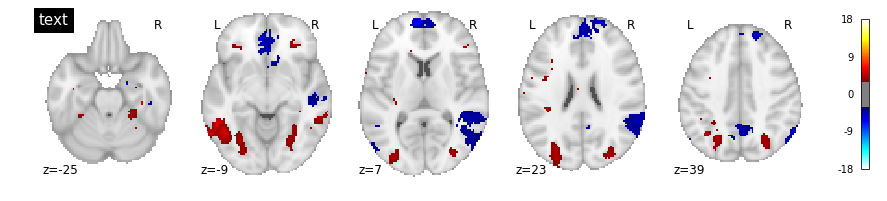

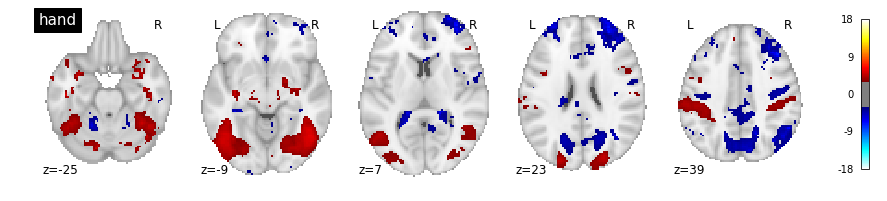

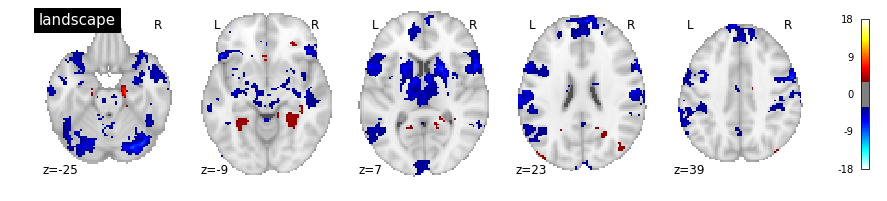

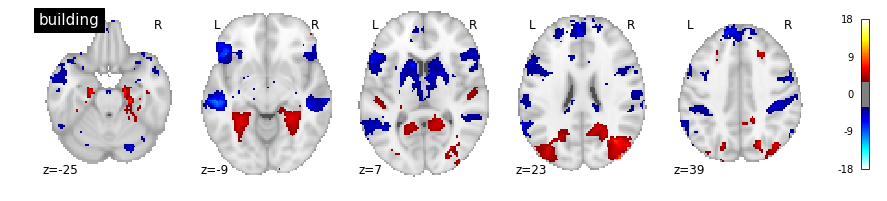

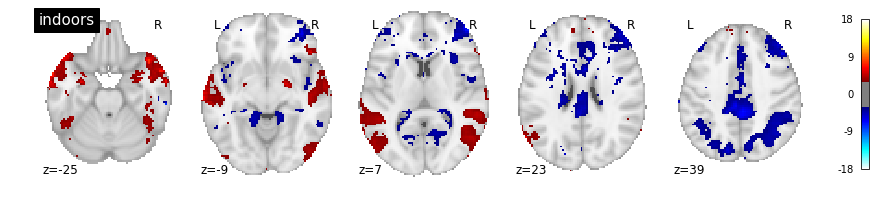

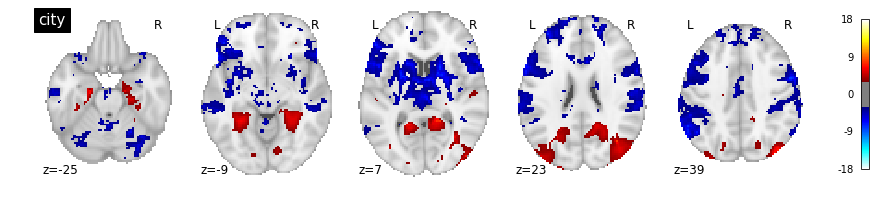

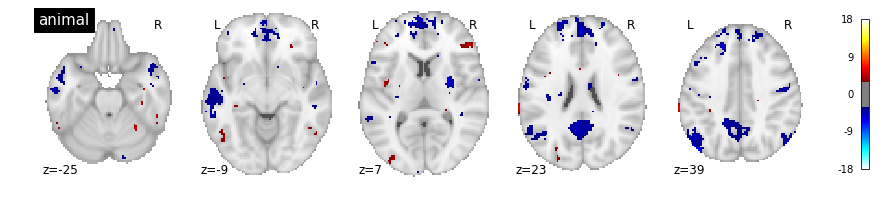

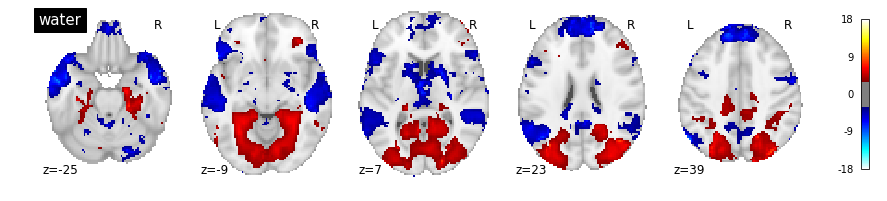

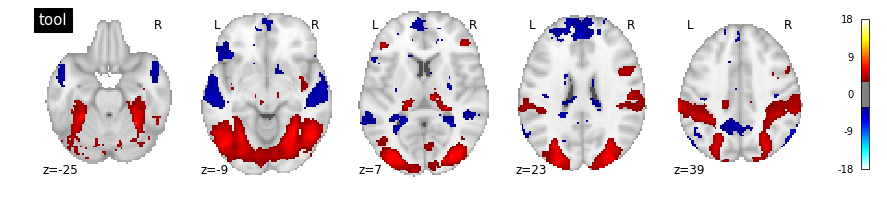

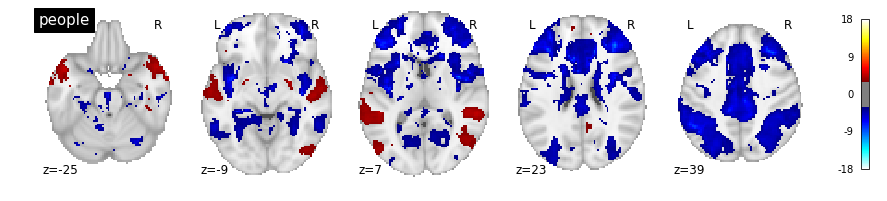

In [16]:
clarifai = ['text',  'hand', 'landscape', 'building', 'indoors', 'city', 'animal', 'water', 'tool', 'people']
for label in clarifai:
    analyze_collection(
        single_predictors[label], 
        collection_kwargs={'estimator': 'afni'},
        plot_kwargs=dict(vmax=18, cut_coords=range(-25, 55, 16), threshold=3.29)
    )

INFO:nimare.extract.utils:Dataset found in /home/alejandro/repos/neuroscout-paper/meta/images/speech

INFO:nimare.utils:Shared path detected: '/home/alejandro/repos/neuroscout-paper/meta/images/speech/'
INFO:nimare.utils:Shared path detected: '/home/alejandro/repos/neuroscout-paper/meta/images/speech/'


meta-analyzing 20 for speech


/home/alejandro/anaconda3/lib/python3.7/site-packages/nilearn/_utils/niimg.py:62: UserWarning: Non-finite values detected. These values will be replaced with zeros.
  "Non-finite values detected. "
INFO:nimare.extract.utils:Dataset found in /home/alejandro/repos/neuroscout-paper/meta/images/rms

INFO:nimare.utils:Shared path detected: '/home/alejandro/repos/neuroscout-paper/meta/images/rms/'
INFO:nimare.utils:Shared path detected: '/home/alejandro/repos/neuroscout-paper/meta/images/rms/'


meta-analyzing 21 for rms


/home/alejandro/anaconda3/lib/python3.7/site-packages/nilearn/_utils/niimg.py:62: UserWarning: Non-finite values detected. These values will be replaced with zeros.
  "Non-finite values detected. "


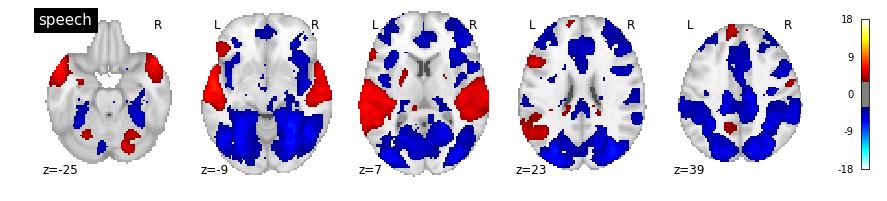

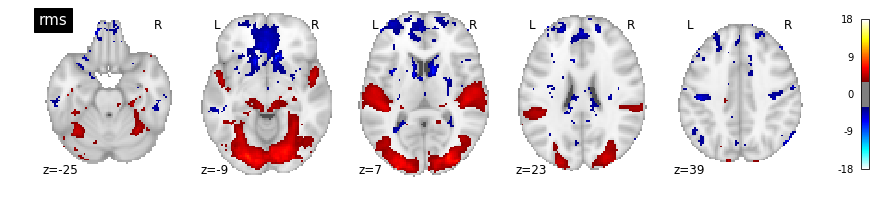

In [17]:
auditory = ['speech', 'rms']
for label in auditory:
    analyze_collection(
        single_predictors[label], 
        collection_kwargs={'estimator': 'afni'},
        plot_kwargs=dict(vmax=18, cut_coords=range(-25, 55, 16), threshold=3.29)
    )

INFO:nimare.utils:Shared path detected: '/home/alejandro/repos/neuroscout-paper/meta/images/building/'


meta-analyzing 20 for building


/home/alejandro/anaconda3/lib/python3.7/site-packages/nilearn/_utils/niimg.py:62: UserWarning: Non-finite values detected. These values will be replaced with zeros.
  "Non-finite values detected. "
/home/alejandro/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


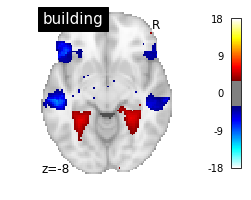

In [18]:
analyze_collection(
    single_predictors['building'], 
    collection_kwargs={'estimator': 'afni'},
    plot_kwargs=dict(vmax=18, threshold=3.29, cut_coords=[-8])
)

INFO:nimare.utils:Shared path detected: '/home/alejandro/repos/neuroscout-paper/meta/images/building/'
INFO:nimare.utils:Shared path detected: '/home/alejandro/repos/neuroscout-paper/meta/images/building/'


meta-analyzing 10 for building


/home/alejandro/anaconda3/lib/python3.7/site-packages/nilearn/_utils/niimg.py:62: UserWarning: Non-finite values detected. These values will be replaced with zeros.
  "Non-finite values detected. "
/home/alejandro/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


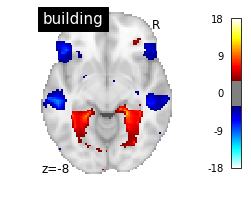

In [19]:
# No NNDB

analyze_collection(
    single_predictors['building'], 
    collection_kwargs={'estimator': 'afni'},
    exclude_datasets=['NaturalisticNeuroimagingDatabase'],
    plot_kwargs=dict(vmax=18, threshold=3.29, cut_coords=[-8])
)

In [20]:
other_datasets = [d['name'] for d in ns.datasets.get() if d['name'] != 'NaturalisticNeuroimagingDatabase']

INFO:nimare.utils:Shared path detected: '/home/alejandro/repos/neuroscout-paper/meta/images/building/'
INFO:nimare.utils:Shared path detected: '/home/alejandro/repos/neuroscout-paper/meta/images/building/'


meta-analyzing 11 for building


/home/alejandro/anaconda3/lib/python3.7/site-packages/nilearn/_utils/niimg.py:62: UserWarning: Non-finite values detected. These values will be replaced with zeros.
  "Non-finite values detected. "
/home/alejandro/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


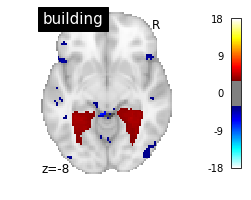

In [22]:
# NNDB only
analyze_collection(
    single_predictors['building'], 
    collection_kwargs={'estimator': 'afni'},
    exclude_datasets=other_datasets,
    plot_kwargs=dict(vmax=18, threshold=3.29, cut_coords=[-8])
)